In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

# **Loading Dataset**

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')
test_labels_df = pd.read_csv('/content/drive/MyDrive/Dataset/test_labels.csv')

category_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# **Merge and prepare Test Data**

In [5]:
test_full = test_df.merge(test_labels_df, on='id')
test_full = test_full[test_full['toxic'] != -1]

# **Data Exploration**

In [6]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
test_full.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [8]:
train_df.shape, test_full.shape

((159571, 8), (63978, 8))

In [9]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
train_df[category_cols].sum()

,0
toxic,15294
severe_toxic,1595
obscene,8449
threat,478
insult,7877
identity_hate,1405


# **Checking for Missing values**

In [13]:
train_df.isnull().sum()

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [14]:
test_full.isnull().sum()

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


# **Class Distribution**

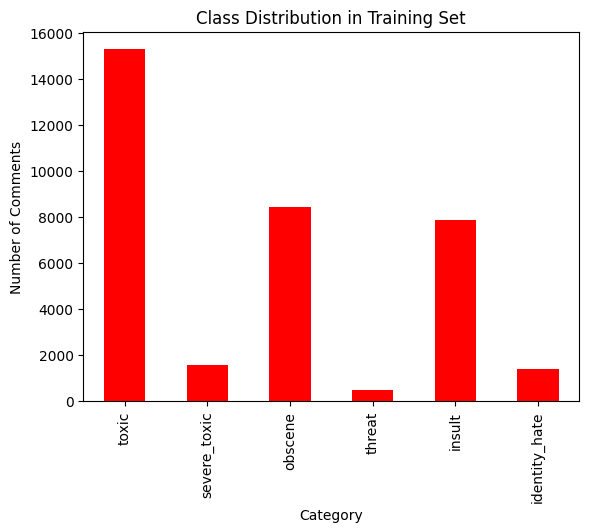

In [15]:
import matplotlib.pyplot as plt

train_df[category_cols].sum().plot(kind='bar', color='red')
plt.title('Class Distribution in Training Set')
plt.ylabel('Number of Comments')
plt.xlabel('Category')
plt.show()

# **Visualize Comment Length**

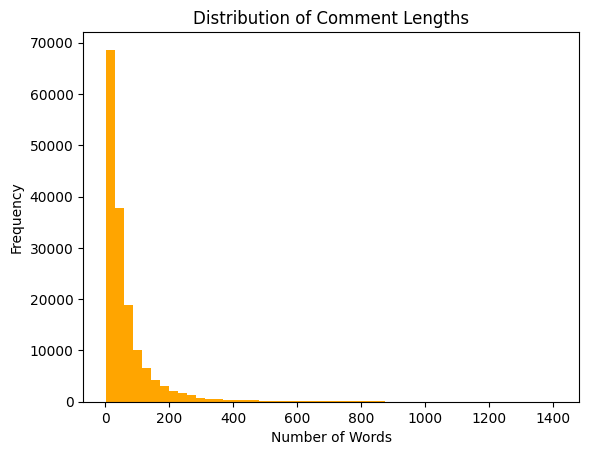

In [16]:
train_df['comment_length'] = train_df['comment_text'].apply(lambda x: len(str(x).split()))
plt.hist(train_df['comment_length'], bins=50, color='orange')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# **Clean Text**

In [17]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_df['comment_text_clean'] = train_df['comment_text'].apply(clean_text)
test_full['comment_text_clean'] = test_full['comment_text'].apply(clean_text)

# **Remove Stopwords**

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

train_df['comment_text_final'] = train_df['comment_text_clean'].apply(remove_stopwords)
test_full['comment_text_final'] = test_full['comment_text_clean'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Prepare Train/Test Data**

In [19]:
X_train = train_df['comment_text_final']
y_train = train_df[category_cols]
X_test = test_full['comment_text_final']
y_test = test_full[category_cols]

# **Logistic Regression**

# **TF-IDF Vectorization**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr_model = OneVsRestClassifier(LogisticRegression(max_iter=200, solver='liblinear'))
lr_model.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=200,
                                                 solver='liblinear'))

In [29]:
y_pred_lr = lr_model.predict(X_test_tfidf)
y_pred_proba_lr = lr_model.predict_proba(X_test_tfidf)

In [30]:
# This shows how often the model is correct for each label individually.
from sklearn.metrics import accuracy_score


for i, cat in enumerate(category_cols):
    acc = accuracy_score(y_test[cat], y_pred_lr[:, i])
    print(f'Accuracy for {cat}: {acc:.3f}')

Accuracy for toxic: 0.935
Accuracy for severe_toxic: 0.993
Accuracy for obscene: 0.967
Accuracy for threat: 0.997
Accuracy for insult: 0.964
Accuracy for identity_hate: 0.990


In [31]:
accuracies = []
accuracies.append(acc)
average_accuracy = np.mean(accuracies)
print(f"Average per-label accuracy: {average_accuracy:.3f}")

Average per-label accuracy: 0.990


In [32]:
from sklearn.metrics import classification_report

print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=category_cols))

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

        toxic       0.65      0.70      0.67      6090
 severe_toxic       0.38      0.30      0.34       367
      obscene       0.76      0.62      0.68      3691
       threat       0.46      0.20      0.28       211
       insult       0.73      0.52      0.61      3427
identity_hate       0.68      0.27      0.39       712

    micro avg       0.68      0.60      0.64     14498
    macro avg       0.61      0.43      0.49     14498
 weighted avg       0.69      0.60      0.63     14498
  samples avg       0.06      0.05      0.06     14498



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.metrics import roc_auc_score

print("Logistic Regression - ROC-AUC Scores:")
for i, cat in enumerate(category_cols):
    auc = roc_auc_score(y_test[cat], y_pred_proba_lr[:, i])
    print(f'  ROC-AUC for {cat}: {auc:.3f}')

macro_auc = roc_auc_score(y_test, y_pred_proba_lr, average='macro')
print(f'\nMacro Average ROC-AUC: {macro_auc:.3f}')

Logistic Regression - ROC-AUC Scores:
  ROC-AUC for toxic: 0.953
  ROC-AUC for severe_toxic: 0.982
  ROC-AUC for obscene: 0.968
  ROC-AUC for threat: 0.981
  ROC-AUC for insult: 0.962
  ROC-AUC for identity_hate: 0.974

Macro Average ROC-AUC: 0.970


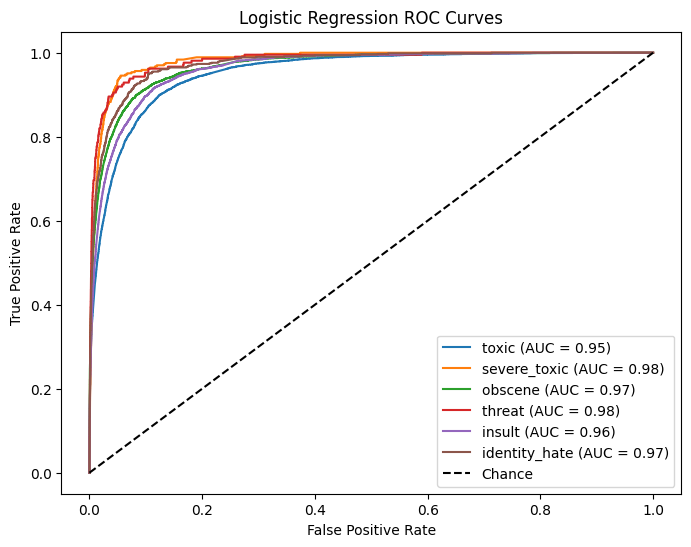

In [34]:
# This plot visually represents the trade-off between true positive rate and false positive rate.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for i, cat in enumerate(category_cols):
    fpr, tpr, _ = roc_curve(y_test[cat], y_pred_proba_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cat} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curves')
plt.legend()
plt.show()

In [35]:
# Save Logistic Regression Model and Vectorizer
import joblib

joblib.dump(lr_model, 'toxic_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

# **Save config File**

In [36]:
#Save Config File
import json

config = {
    "toxicity_threshold": 0.75,
    "flag_threshold": 0.5,
    "enabled_categories": ["toxic", "insult", "harassment"]
}
with open('config.json', 'w') as f:
    json.dump(config, f, indent=2)

In [37]:
from google.colab import files
files.download('toxic_classifier.pkl')
files.download('tfidf_vectorizer.pkl')
files.download('config.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>